### Importing Libraries for our code

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # set the default Seaborn style for graphics

### Importing dataset 

In [20]:
ufc_new = pd.read_csv("ufc_master_STABLE.csv")
ufc_new.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Curtis Blaydes,Chris Daukaus,-550.0,400,18.181818,400.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,Punch,2.0,0:17,317.0,260.0,1300.0,800.0,1500.0,-125.0,430.0
1,Joanne Wood,Alexa Grasso,230.0,-280,230.000000,35.714286,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,Rear Naked Choke,1.0,3:57,237.0,340.0,-140.0,1000.0,800.0,900.0,650.0
2,Matt Brown,Bryan Barberena,-105.0,-115,95.238095,86.956522,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,260.0,1200.0,800.0,160.0,300.0
3,Askar Askarov,Kai Kara-France,-440.0,340,22.727273,340.000000,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,-120.0,550.0,300.0,2200.0,700.0,550.0
4,Neil Magny,Max Griffin,-260.0,210,38.461538,210.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,NaN,3.0,5:00,900.0,-120.0,400.0,750.0,1400.0,500.0,500.0


In [21]:
# Information about the Variables

ufc_new[list(ufc_new.columns)[0:50]].info()
print("================================================")
ufc_new[list(ufc_new.columns)[50:120]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5140 entries, 0 to 5139
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     5140 non-null   object 
 1   B_fighter                     5140 non-null   object 
 2   R_odds                        5139 non-null   float64
 3   B_odds                        5140 non-null   int64  
 4   R_ev                          5139 non-null   float64
 5   B_ev                          5140 non-null   float64
 6   date                          5140 non-null   object 
 7   location                      5140 non-null   object 
 8   country                       5140 non-null   object 
 9   Winner                        5140 non-null   object 
 10  title_bout                    5140 non-null   bool   
 11  weight_class                  5140 non-null   object 
 12  gender                        5140 non-null   object 
 13  no_

# Data Preparation and Cleaning
Before we explore our dataset, we first determine the columns we are interested in exploring. Since some of the values in the columns do contain NaN values, we had to clean the data in the columns by removing them.


In [22]:
eda_columns = ["weight_class","B_odds","finish","R_odds","finish_round","R_wins",
               "R_draw","R_losses","B_wins","B_draw","B_losses","R_age","R_Height_cms","R_Weight_lbs",
               "R_Reach_cms","B_age","B_Height_cms","B_Weight_lbs","B_Reach_cms","Winner"]

ufc_new = ufc_new[eda_columns] 


for column in eda_columns:
    ufc_new = ufc_new[ufc_new[column].isnull()==False]

    
# Creating new predictor variable
ufc_new['R_win_pct'] = ufc_new['R_wins'] * 100/ (ufc_new['R_draw'] + ufc_new['R_losses'] + ufc_new['R_wins'])
ufc_new['B_win_pct'] = ufc_new['B_wins'] * 100/ (ufc_new['B_draw'] + ufc_new['B_losses'] + ufc_new['B_wins'])
ufc_new["B_win_pct"].fillna(value = 0, inplace = True)
ufc_new["R_win_pct"].fillna(value = 0, inplace = True)



In [23]:
# Information about the Variables

ufc_new[list(ufc_new.columns)[0:50]].info()
print("================================================")
ufc_new[list(ufc_new.columns)[50:120]].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4517 entries, 0 to 5139
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weight_class  4517 non-null   object 
 1   B_odds        4517 non-null   int64  
 2   finish        4517 non-null   object 
 3   R_odds        4517 non-null   float64
 4   finish_round  4517 non-null   float64
 5   R_wins        4517 non-null   int64  
 6   R_draw        4517 non-null   int64  
 7   R_losses      4517 non-null   int64  
 8   B_wins        4517 non-null   int64  
 9   B_draw        4517 non-null   int64  
 10  B_losses      4517 non-null   int64  
 11  R_age         4517 non-null   int64  
 12  R_Height_cms  4517 non-null   float64
 13  R_Weight_lbs  4517 non-null   int64  
 14  R_Reach_cms   4517 non-null   float64
 15  B_age         4517 non-null   int64  
 16  B_Height_cms  4517 non-null   float64
 17  B_Weight_lbs  4517 non-null   int64  
 18  B_Reach_cms   4517 non-null 

# Exploratory Data Analysis

After cleaning our dataset columns, we perform EDA to explore how the dataset is distributed in terms of category such as the finish and weightclass. We want to also gain insight of the data while we are exploring.

### Gathering Insights on the number of fights in each weightclass

Number of Weightclass Fights : 13
Lightweight              823
Welterweight             766
Middleweight             542
Featherweight            527
Bantamweight             465
Light Heavyweight        368
Heavyweight              344
Flyweight                208
Women's Strawweight      171
Women's Bantamweight     145
Women's Flyweight        121
Catch Weight              23
Women's Featherweight     14
Name: weight_class, dtype: int64


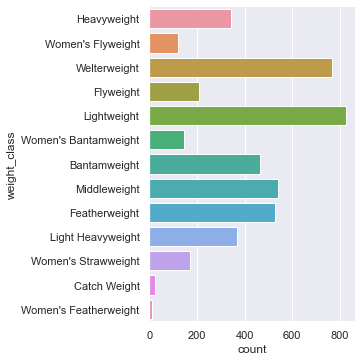

In [24]:
print("Number of Weightclass Fights :", len(ufc_new["weight_class"].unique()))

# Pokemons in each Generation
print(ufc_new["weight_class"].value_counts())
sb.catplot(y = "weight_class", data 
           = ufc_new, kind = "count")

### Gathering Insights on fight finishes

In [25]:
ufc_new["finish"]

0       KO/TKO
1          SUB
2        S-DEC
3        U-DEC
4        S-DEC
         ...  
5135    KO/TKO
5136    KO/TKO
5137    KO/TKO
5138     U-DEC
5139     U-DEC
Name: finish, Length: 4517, dtype: object

### Gathering Insights on the number of each fight outcomes

Number of Fight Outcomes(Way of finish) : 7
U-DEC         1717
KO/TKO        1438
SUB            841
S-DEC          477
M-DEC           30
DQ              12
Overturned       2
Name: finish, dtype: int64


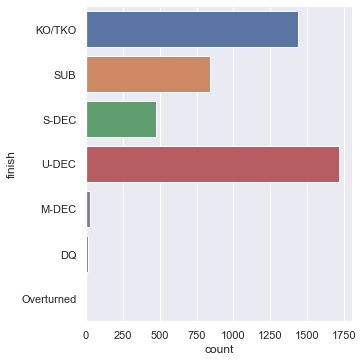

In [26]:
print("Number of Fight Outcomes(Way of finish) :", len(ufc_new["finish"].unique()))

# Pokemons in each Generation
print(ufc_new["finish"].value_counts())
sb.catplot(y = "finish", data = ufc_new, kind = "count")

### Gathering Insights on the spread of number of rounds for each weightclass fight

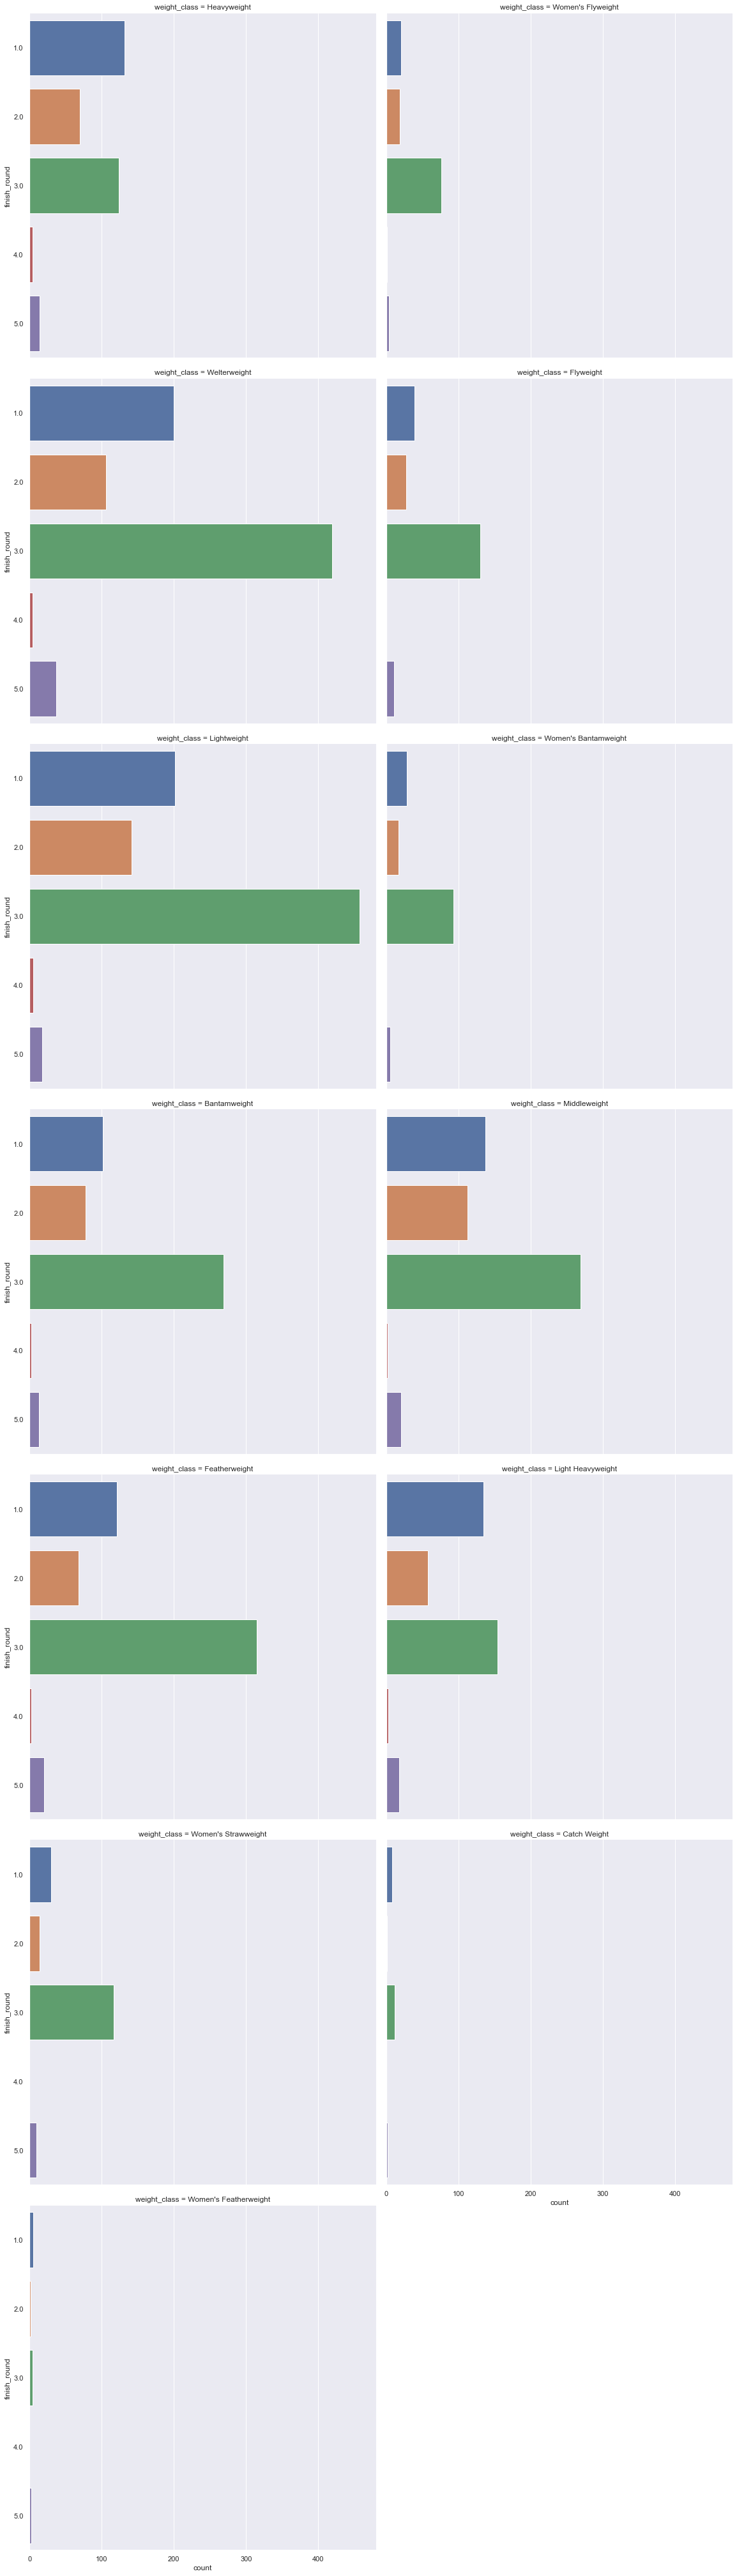

In [27]:
# Primary Type over Generations
sb.catplot(y = 'finish_round', data = ufc_new, col = 'weight_class', kind = 'count', col_wrap = 2, height = 8)

### Gathering Insights on the mean number of rounds for each weightclass fight

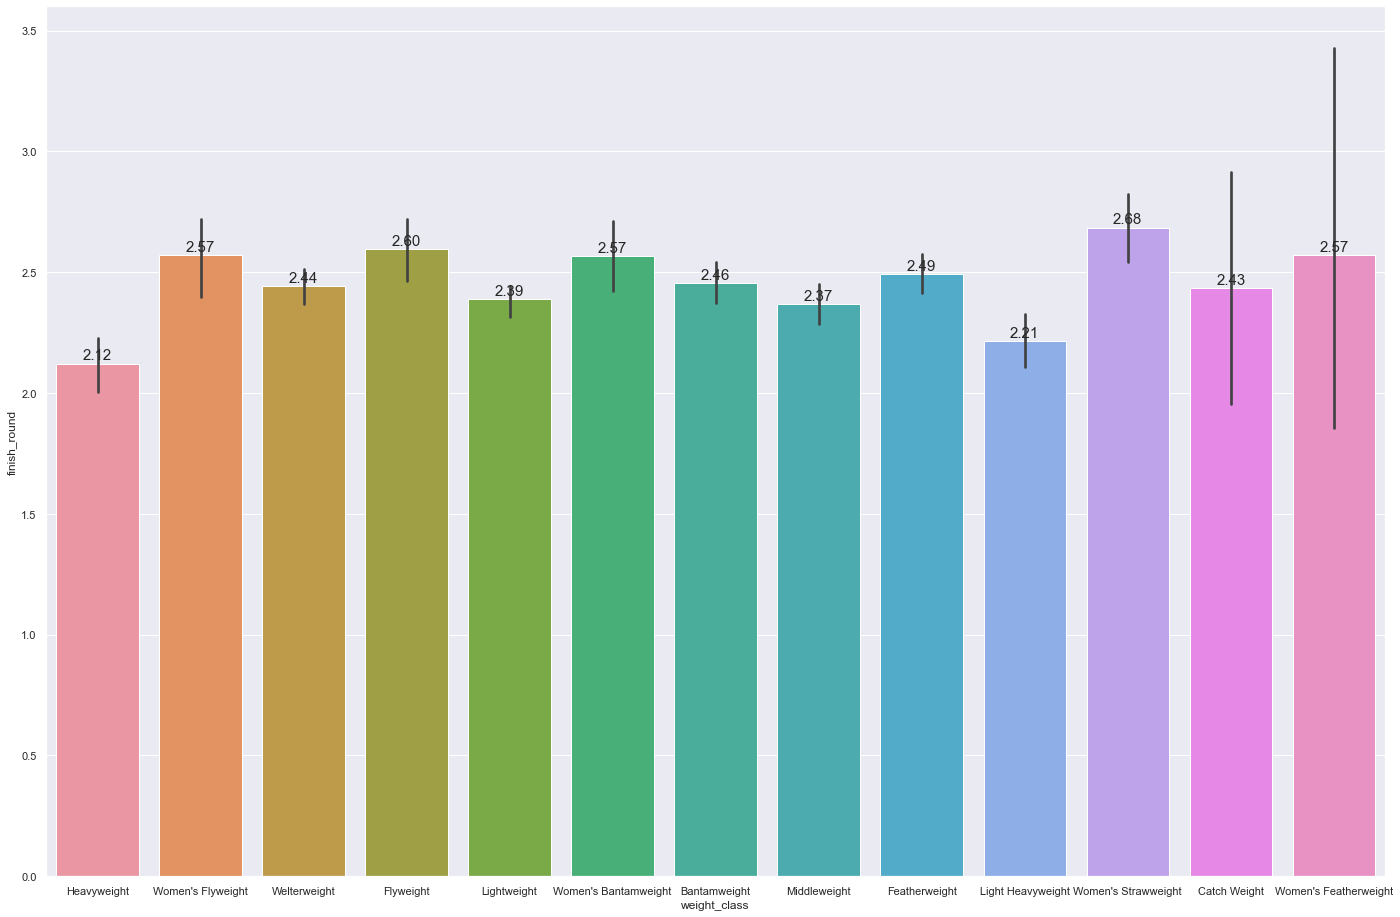

In [28]:
plt.figure(figsize = (24,16))

my_plot = sb.barplot(x="weight_class", y="finish_round", data=ufc_new)
 
# Iterrating over the bars one-by-one
for x in my_plot.patches:
    my_plot.annotate(format(x.get_height(), '.2f'),
                   (x.get_x() + x.get_width() / 2,
                    x.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

## Boxplot of odds split by Winner
In order to create a model for prediction, we try to find some of the columns of data that can give correlations to who will win. 


### Boxplot of B_odds split by Winner
We are able to understand from this boxplot that the B_odds seem to be an important variable in predicting 'Winner' as the boxplots for 'Winner' == 'Red' and 'Winner' == 'Blue' are significantly different. We can tell that there is a strong relationship between the variables B_odds and Winner

<AxesSubplot:xlabel='B_odds', ylabel='Winner'>

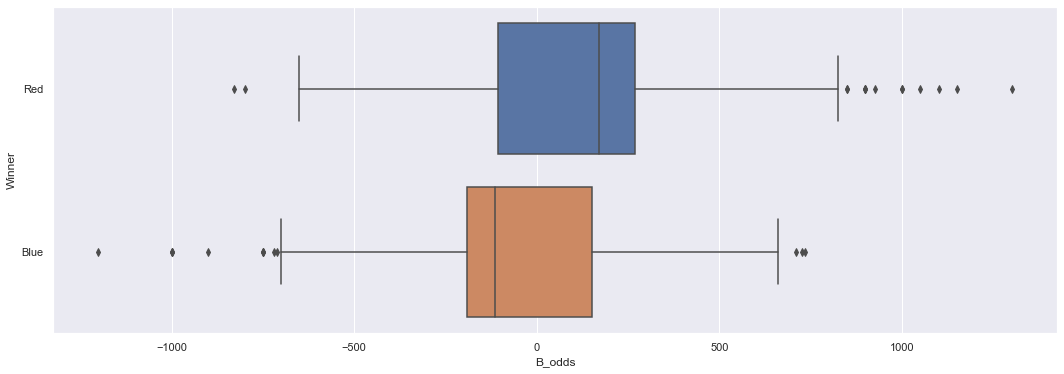

In [31]:
# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x ="B_odds", y = "Winner", data = ufc_new, orient = "h")

### Boxplot of R_odds split by Winner
We are able to understand from this boxplot that the R_odds seem to be a rather important variable in predicting 'Winner' but may not be as important of a variable as B_odds because R_odds boxplot seem to have a larger deviation. We can tell that there is a mildly strong relationship between the variables R_odds and Winner

<AxesSubplot:xlabel='R_odds', ylabel='Winner'>

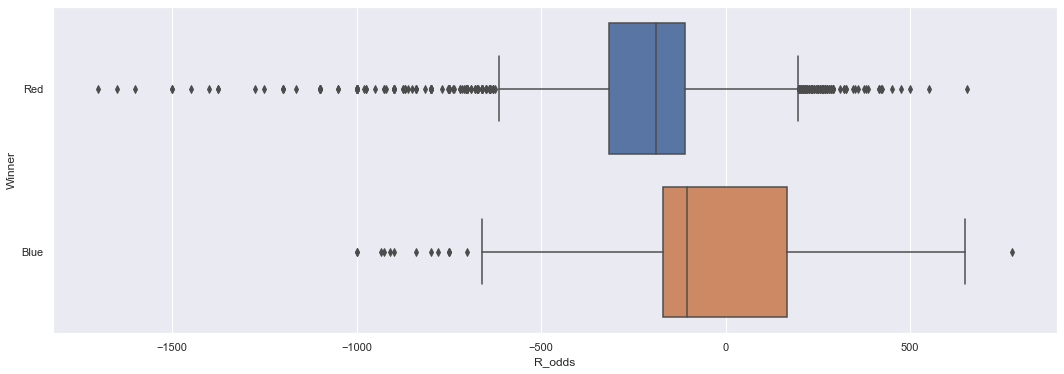

In [32]:
# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x ="R_odds", y = "Winner", data = ufc_new, orient = "h")

### Gathering Insights on correlation of physical attributes of fighters 
#### Using Heatmap of correlation coefficiency

We wanted to look at how the numerical variables of physical attributes of the fighters vary with one another. So, we choose the variables that are unique to the fighter(e.g not specific to a particular match scenario) to see how they relate to one another.
We also want to find out if physical attributes do contribute to each individual fighter's win percentage.

              B_win_pct     B_age  B_Height_cms  B_Weight_lbs  B_Reach_cms  \
B_win_pct      1.000000  0.101342      0.059533      0.065285     0.069989   
B_age          0.101342  1.000000      0.104768      0.214665     0.087169   
B_Height_cms   0.059533  0.104768      1.000000      0.798894     0.867339   
B_Weight_lbs   0.065285  0.214665      0.798894      1.000000     0.745037   
B_Reach_cms    0.069989  0.087169      0.867339      0.745037     1.000000   
B_wins         0.488470  0.377609      0.126991      0.137215     0.131953   

                B_wins  
B_win_pct     0.488470  
B_age         0.377609  
B_Height_cms  0.126991  
B_Weight_lbs  0.137215  
B_Reach_cms   0.131953  
B_wins        1.000000  


<AxesSubplot:>

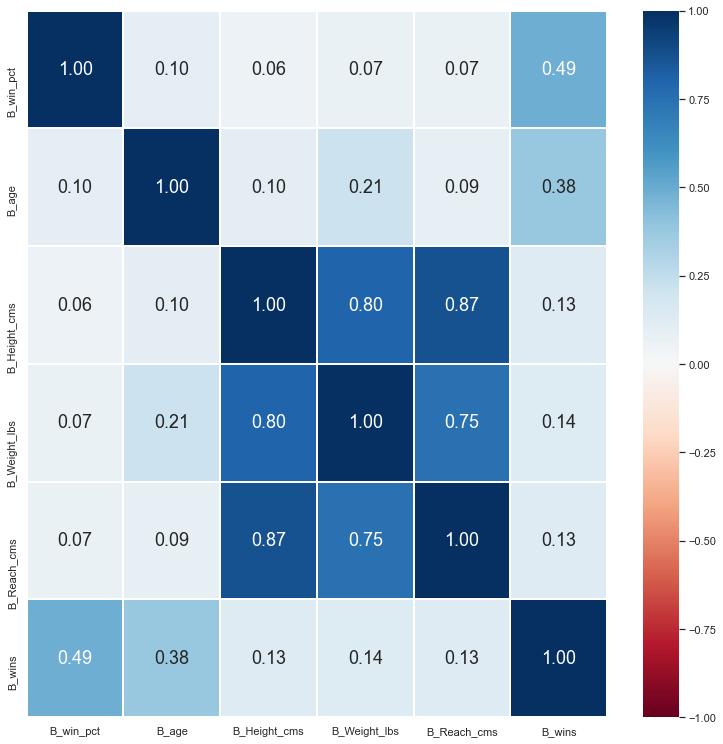

In [33]:
numerical_data_B = pd.DataFrame(ufc_new[["B_win_pct","B_age","B_Height_cms","B_Weight_lbs","B_Reach_cms","B_wins"]])
# Correlation Matrix
print(numerical_data_B.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(13, 13))
sb.heatmap(numerical_data_B.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

              R_win_pct     R_age  R_Height_cms  R_Weight_lbs  R_Reach_cms  \
R_win_pct      1.000000  0.048136      0.059951      0.062583     0.081216   
R_age          0.048136  1.000000      0.115697      0.235624     0.116946   
R_Height_cms   0.059951  0.115697      1.000000      0.796883     0.896899   
R_Weight_lbs   0.062583  0.235624      0.796883      1.000000     0.768147   
R_Reach_cms    0.081216  0.116946      0.896899      0.768147     1.000000   
R_wins         0.387564  0.449299      0.121405      0.138985     0.145809   

                R_wins  
R_win_pct     0.387564  
R_age         0.449299  
R_Height_cms  0.121405  
R_Weight_lbs  0.138985  
R_Reach_cms   0.145809  
R_wins        1.000000  


<AxesSubplot:>

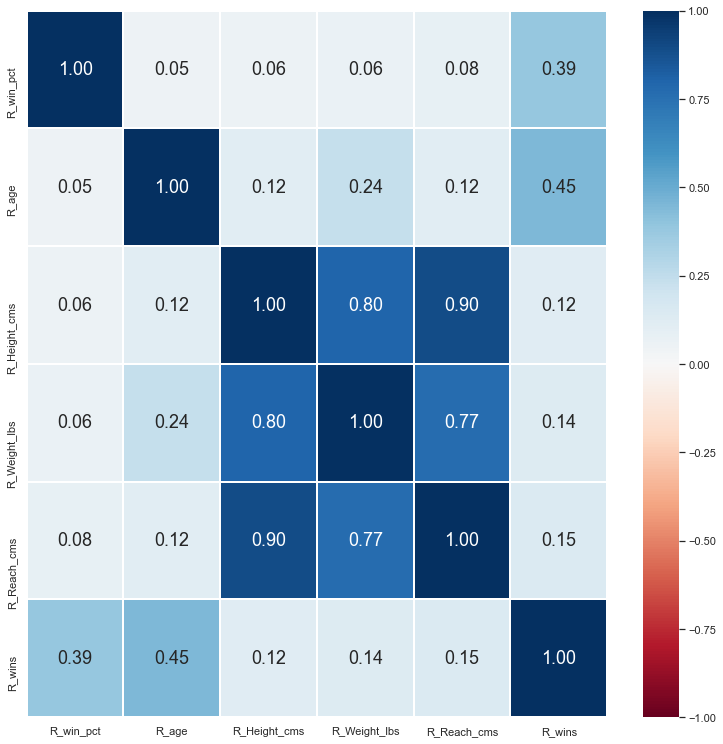

In [34]:
numerical_data_R = pd.DataFrame(ufc_new[["R_win_pct","R_age","R_Height_cms","R_Weight_lbs","R_Reach_cms", "R_wins"]])
print(numerical_data_R.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(13, 13))
sb.heatmap(numerical_data_R.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Insights on correlation of physical attributes of fighters 

What we gathered is that certain physical attributes like height,reach and weight seem to have a high correlation coefficient with each other.

<br>
However, for the win percentages, it did not seem to bear any linear relationship with that of the physical attributes of the fighter. One reason for that could be because the matchups are determined based on weight class so fighters will face other fighters of about the same physical attributes and so they will not have much advantage from their physique. 

<br>

We do not have access to data of certain intangible attributes like strength and intelligence of the fighters and those are what we believe may have higher correlation with win percentage than all the aforementioned physical attributes.

## End of EDA 

We found out the number of weight class fights there is for our data. We only use weight classes with a larger enough sample size. 

Larger sample size would give us more data for our prediction to be more accurate. This is because as our sample size increases, the confidence in our estimate will increase and our uncertainty will decrease. A large enough sample size would also prevent our model from being skewed by outliers or a limited spread of data sets into one of high bias and variance.


Afterward, we split the dataset set into each individual weight class to perform machine learning.
